In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset
df = pd.read_csv(r'national_generation_capacity_stacked.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37279 entries, 0 to 37278
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     37279 non-null  int64  
 1   technology             37279 non-null  object 
 2   source                 37279 non-null  object 
 3   source_type            37279 non-null  object 
 4   weblink                33535 non-null  object 
 5   year                   37279 non-null  int64  
 6   type                   37279 non-null  object 
 7   country                37279 non-null  object 
 8   capacity_definition    37279 non-null  object 
 9   capacity               36333 non-null  float64
 10  comment                0 non-null      float64
 11  energy_source_level_0  37279 non-null  bool   
 12  energy_source_level_1  37279 non-null  bool   
 13  energy_source_level_2  37279 non-null  bool   
 14  energy_source_level_3  37279 non-null  bool   
 15  te

In [4]:
df.head()

,ID,technology,source,source_type,weblink,year,type,country,capacity_definition,capacity,comment,energy_source_level_0,energy_source_level_1,energy_source_level_2,energy_source_level_3,technology_level
0,0,Fossil fuels,e-control,Regulatory Authority,https://www.e-control.at/documents/1785851/181...,2014,Installed capacity in MW,AT,Gross capacity,7243.634,NaN,False,True,False,False,False
1,1,Fossil fuels,e-control,Regulatory Authority,https://www.e-control.at/documents/1785851/181...,2015,Installed capacity in MW,AT,Gross capacity,7059.065,NaN,False,True,False,False,False
2,2,Fossil fuels,e-control,Regulatory Authority,https://www.e-control.at/documents/1785851/181...,2016,Installed capacity in MW,AT,Gross capacity,7323.000,NaN,False,True,False,False,False
3,3,Fossil fuels,e-control,Regulatory Authority,https://www.e-control.at/documents/1785851/181...,2017,Installed capacity in MW,AT,Gross capacity,6469.000,NaN,False,True,False,False,False
4,4,Fossil fuels,e-control,Regulatory Authority,https://www.e-control.at/documents/1785851/181...,2018,Installed capacity in MW,AT,Gross capacity,6492.000,NaN,False,True,False,False,False


In [6]:
df.isnull().sum()

ID                           0
technology                   0
source                       0
source_type                  0
weblink                   3744
year                         0
type                         0
country                      0
capacity_definition          0
capacity                   946
comment                  37279
energy_source_level_0        0
energy_source_level_1        0
energy_source_level_2        0
energy_source_level_3        0
technology_level             0
dtype: int64

In [7]:
# Drop 'Comment' column
df.drop(columns=['comment'], inplace=True)

In [8]:
# Drop missing values
df.dropna(inplace=True)

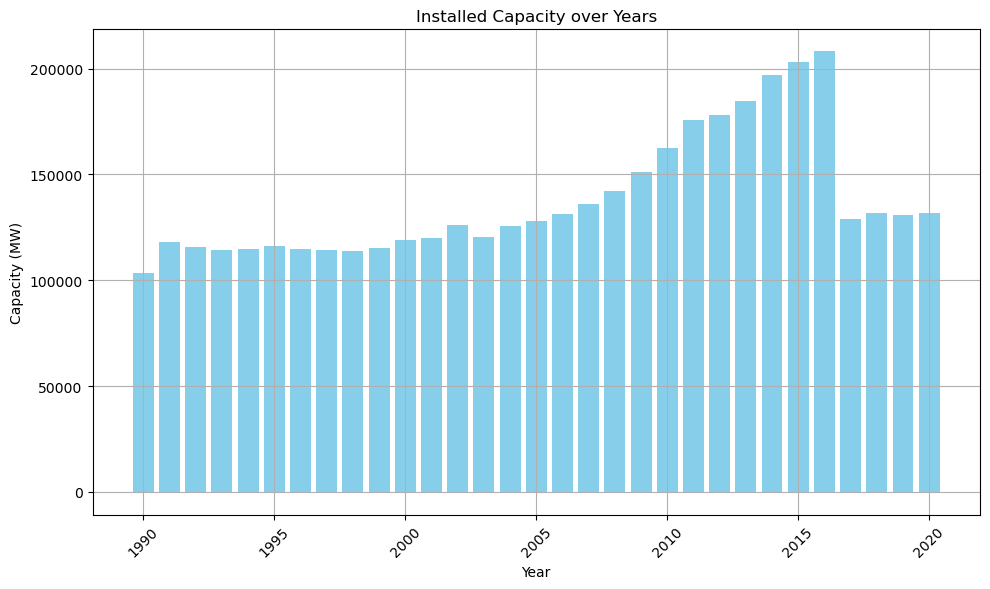

In [9]:
# Visualize
plt.figure(figsize=(10, 6))
plt.bar(df['year'], df['capacity'], color='skyblue')
plt.xlabel('Year')
plt.ylabel('Capacity (MW)')
plt.title('Installed Capacity over Years')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

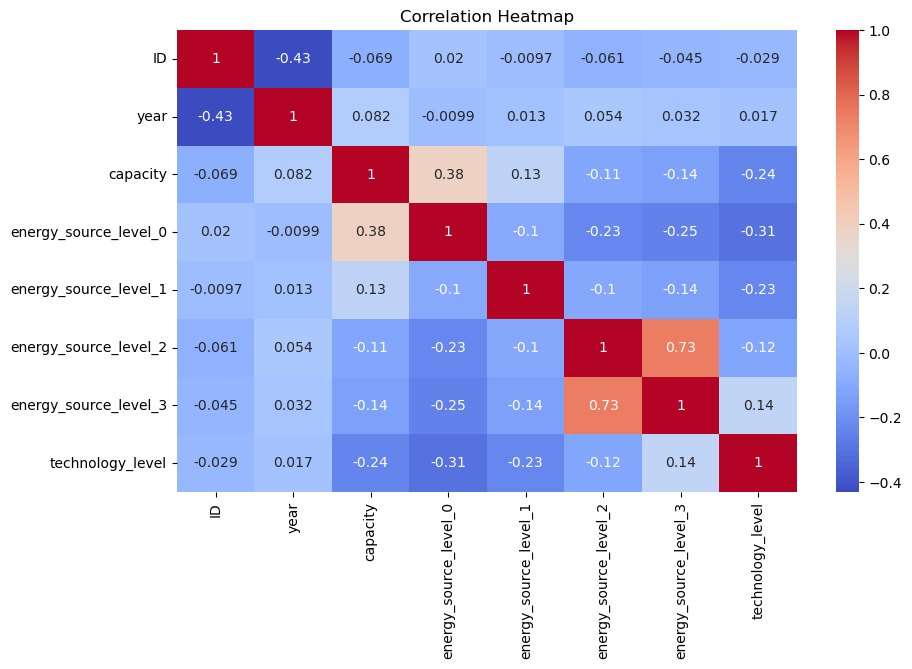

In [10]:
# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

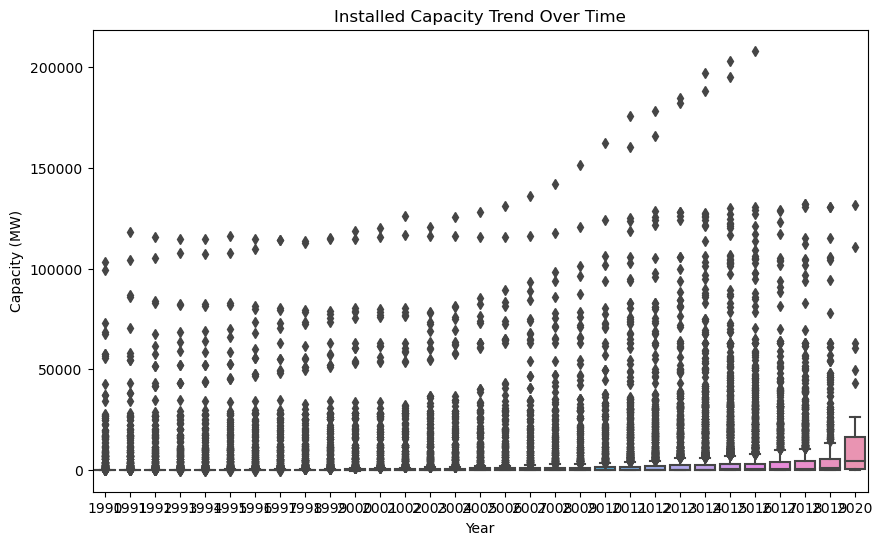

In [12]:
# Installed capacity trend over time
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='year', y='capacity')
plt.title('Installed Capacity Trend Over Time')
plt.xlabel('Year')
plt.ylabel('Capacity (MW)')
plt.show()

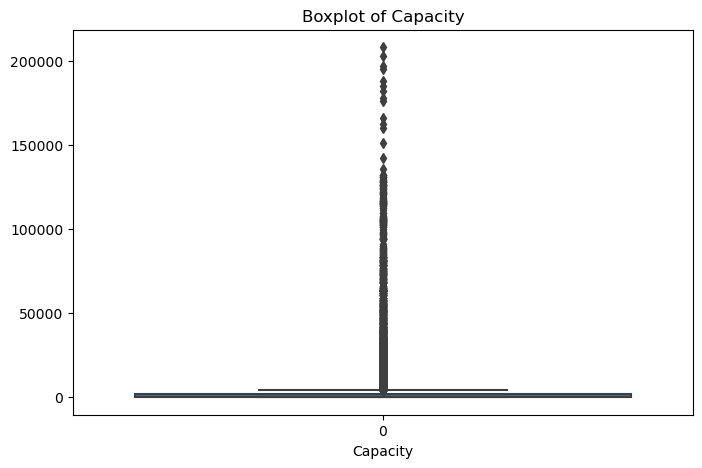

In [13]:
# Boxplot for outlier detection
plt.figure(figsize=(8, 5))
sns.boxplot(data=df['capacity'])
plt.title('Boxplot of Capacity')
plt.xlabel('Capacity')
plt.show()


In [14]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [15]:
# Assuming a binary classification task where we predict whether capacity is above a certain threshold
threshold = 10000 

# Create a binary target variable based on whether capacity is above the threshold
df['Above_Threshold'] = (df['capacity'] > threshold).astype(int)

In [16]:
# Select features and target variable
X = df[['year', 'capacity']]
y = df['Above_Threshold']

In [17]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict on the testing data
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9996931574102486
